In [1]:
!pip install rapidfuzz

In [2]:
import pandas as pd
import matplotlib.pyplot as plt #visualisasi data
import numpy as np #proses nilai numerik
import seaborn as sns #visualisasi data
import scipy.stats as stats
from sqlalchemy import create_engine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Format connection string
username = "postgres"
password = "Fajrimughni9"
host = "localhost"
port = "5432"
database = "Finpro Master DS29"

# Buat engine SQLAlchemy
engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/{database}")

# Dataset

In [4]:
df_zomato = pd.read_csv("selected_zomato_indonesia.csv")
df_nutrition = pd.read_csv("selected_nutrition.csv")
df_recipe = pd.read_csv("selected_recipe.csv")
df_consumption = pd.read_csv("df_consumption_cleaned.csv")

# Pre-processing Data

In [5]:
df_consumption.shape

(710, 28)

In [6]:
df_recipe.shape

(1916, 4)

In [7]:
df_nutrition.shape

(1346, 6)

In [8]:
df_recipe.head(5)

,title,ingredients,steps,loves
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4


In [9]:
df_nutrition.head(5)

,id,name,calories,proteins,fat,carbohydrate
0,1,Abon,280.0,9.2,28.4,0.0
1,2,Abon haruwan,513.0,23.7,37.0,21.3
2,3,Agar-agar,0.0,0.0,0.2,0.0
3,4,Akar tonjong segar,45.0,1.1,0.4,10.8
4,5,Aletoge segar,37.0,4.4,0.5,3.8


## Mapping Title/Nama Resep

In [10]:
# Buat vectorizer
vectorizer = TfidfVectorizer().fit(df_recipe['title'].tolist() + df_nutrition['name'].tolist())

In [11]:
# Transform judul dan nama nutrisi
recipe_vecs = vectorizer.transform(df_recipe['title'])
nutrition_vecs = vectorizer.transform(df_nutrition['name'])

In [12]:
# Hitung similarity
similarity_matrix = cosine_similarity(recipe_vecs, nutrition_vecs)

In [13]:
similarity_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1916, 1346))

In [14]:
# Ambil hasil paling mirip
best_matches = similarity_matrix.argmax(axis=1)
match_scores = similarity_matrix.max(axis=1)

In [15]:
# Masukkan ke DataFrame
df_recipe['matched_name'] = df_nutrition.loc[best_matches, 'name'].values
df_recipe['match_score'] = match_scores * 100

## Profil Konsumen

In [16]:
df_consumption.head()

,a1_city,a2_province,b3_gender,b4_age,b5_religion,b6_ethnic,b7_education_level,b8_lived_in_urban_area_years,b9_occupation,b10_social_clas,...,e19_religious_value_in_eating_places,e20_religious_value_in_consumption_pattern,e21_custom_value_in_type_of_food,e22_custom_value_in_eating_places,e23_custom_value_in_consumption_pattern,24_practice_of_food_consumption_based_on_religious_rules,25_practice_of_food_consumption_based_on_custom_rules,e26_buying_food_product_in_the_right_place_based_on_religious_rules,e27_type_of_dishes_variation_based_on_religious_rules,e28_practice_of_consuming_traditional_food
0,Jakarta,DKI Jakarta,Female,31,Islam,Java,Senior High School,31,Private Employees,Lower Class,...,Neither agree nor disagree,Agree,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree,Agree
1,Jakarta,DKI Jakarta,Female,36,Islam,Java,Bachelor degree,32,Private Employees,Lower Class,...,Agree,Agree,Strongly Agree,Agree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree
2,Jakarta,DKI Jakarta,Male,24,Islam,Java,Senior High School,24,Private Employees,Middle Class,...,Agree,Neither agree nor disagree,Neither agree nor disagree,Disagree,Agree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree
3,Jakarta,DKI Jakarta,Female,63,Islam,Other,Senior High School,32,Private Employees,Lower Class,...,Agree,Neither agree nor disagree,Agree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Disagree,Neither agree nor disagree,Agree
4,Jakarta,DKI Jakarta,Male,43,Protestant,Batak,Primary School,43,Government Employees,Lower Class,...,Strongly Agree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly Agree,Strongly Agree,Agree,Disagree,Agree,Agree


In [17]:
df_consumption.columns

Index(['a1_city', 'a2_province', 'b3_gender', 'b4_age', 'b5_religion',
       'b6_ethnic', 'b7_education_level', 'b8_lived_in_urban_area_years',
       'b9_occupation', 'b10_social_clas', 'b11_household_member',
       'c12_household_income_monthly_in_million_idr',
       'c13_time_of_income_receipt',
       'c14_household_expenditure_monthly_in_million_idr',
       'c15_%_monthly_expenditure_for_food', 'd16_health_factor',
       'd17_price_factor', 'e18_religious_value_in_type_of_food',
       'e19_religious_value_in_eating_places',
       'e20_religious_value_in_consumption_pattern',
       'e21_custom_value_in_type_of_food', 'e22_custom_value_in_eating_places',
       'e23_custom_value_in_consumption_pattern',
       '24_practice_of_food_consumption_based_on_religious_rules',
       '25_practice_of_food_consumption_based_on_custom_rules',
       'e26_buying_food_product_in_the_right_place_based_on_religious_rules',
       'e27_type_of_dishes_variation_based_on_religious_rules',
   

In [18]:
# Hapus prefix angka dan huruf di depan underscore
df_consumption.columns = df_consumption.columns.str.replace(r'^[a-zA-Z0-9]+_', '', regex=True)

In [19]:
df_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 28 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   city                                                             710 non-null    object
 1   province                                                         710 non-null    object
 2   gender                                                           710 non-null    object
 3   age                                                              710 non-null    int64 
 4   religion                                                         710 non-null    object
 5   ethnic                                                           710 non-null    object
 6   education_level                                                  710 non-null    object
 7   lived_in_urban_area_years                            

In [20]:
# Tambahkan age_group
def get_age_group(age):
    if 18 <= age <= 25:
        return '18–25'
    elif 26 <= age <= 35:
        return '26–35'
    elif 36 <= age <= 45:
        return '36–45'
    elif 46 <= age <= 55:
        return '46–55'
    else:
        return '56+'

In [21]:
df_consumption['age_group'] = df_consumption['age'].apply(get_age_group)

In [22]:
# Buat preferensi langsung per baris
df_consumption['prefer_traditional'] = df_consumption['practice_of_consuming_traditional_food'].apply(lambda x: 'Yes' if x == 'Agree' else 'No')
df_consumption['prefer_healthy'] = df_consumption['health_factor'].apply(lambda x: 'Yes' if x == 'Agree' else 'No')

In [23]:
# Pilih kolom akhir profil
consumer_profile = df_consumption[['gender', 'age_group', 'prefer_traditional', 'prefer_healthy']].copy()

# Lihat contoh
print(consumer_profile.head())

   gender age_group prefer_traditional prefer_healthy
0  Female     26–35                Yes             No
1  Female     36–45                 No             No
2    Male     18–25                 No             No
3  Female       56+                Yes             No
4    Male     36–45                Yes             No


In [24]:
consumer_profile.isnull().values.any()

np.False_

# Model

In [25]:
df_recipe.shape

(1916, 6)

In [26]:
df_recipe.sample(5)

,title,ingredients,steps,loves,matched_name,match_score
910,Ayam saus teriyaki,1 bh bawang bombay--3 bh bawang putih cincang-...,Iris dadu dada ayam. lalu lumuri dengan bumbu ...,3,Chicken teriyaki masakan,46.918955
1476,Ayam Goreng Tepung\n#KisahKasihCookpad,1 ekor ayam potong potong--7 siung bawang puti...,"Campurkan ayam, bawang, merica, garam dan kald...",4,Tepung Ikan,36.959373
564,Opor Ayam,1 ekor ayam--1 1/2 liter santan encer--200 ml ...,"Bersihkan ayam, potong sesuai selera--Tumis bu...",3,Ayam,30.197982
746,Ayam Asam Manis Simpel,1 dada ayam uk besar (buang kulit dan filet)--...,Masukan filet ayam ke dalam bumbu perendam dan...,16,Terong Asam,34.980493
501,Ayam sambal balado,1 kg ayam--15 buah Cabe merah--5 buah Bawang m...,Haluskan bawang putih 1 buah dan kemiri 3 bji-...,39,Teri balado masakan,42.058569


In [27]:
# Hapus baris yang matched_name-nya NaN
df_recipe_cleaned = df_recipe[df_recipe['matched_name'].notna()].reset_index(drop=True)

In [28]:
df_recipe_cleaned.shape

(1916, 6)

In [29]:
df_recipe_cleaned.sample(5)

,title,ingredients,steps,loves,matched_name,match_score
63,Ayam Goreng,1 ekor ayam (cuci dan rebus sebentar untuk ngu...,"Siapkan sedikit air dalam panci, didihkan--Jik...",1,Mie Goreng,52.796268
375,Lemper ayam,2 kg beras ketam siyem (rendam semalaman)--2 b...,"Kukus ketan selama 15 menit,di saat yg sama re...",7,Lemper,97.729573
85,Ayam asam manis,3 iris ayam (potong kecil2 sesuai selera)--Sec...,Ayam yang telah dipotong kecil dicelupkan ke d...,2,Terong Asam,45.145941
1287,Nuget ayam,1/2 kg dada ayam--1 bh wortel (diserut)--1 but...,Karna sy pakenya ayam utuh jd filet sendiri gi...,6,Ayam,19.888994
1444,Ayam Kremes,1 ekor ayam utuh.potong ukuran kecil--8 siung ...,Cuci bersih ayam yang sudah di potong2.--Halus...,2,Ayam,24.120927


In [30]:
df_nutrition.head(5)

,id,name,calories,proteins,fat,carbohydrate
0,1,Abon,280.0,9.2,28.4,0.0
1,2,Abon haruwan,513.0,23.7,37.0,21.3
2,3,Agar-agar,0.0,0.0,0.2,0.0
3,4,Akar tonjong segar,45.0,1.1,0.4,10.8
4,5,Aletoge segar,37.0,4.4,0.5,3.8


In [31]:
consumer_profile.head(5)

,gender,age_group,prefer_traditional,prefer_healthy
0,Female,26–35,Yes,No
1,Female,36–45,No,No
2,Male,18–25,No,No
3,Female,56+,Yes,No
4,Male,36–45,Yes,No


## Mapping Ulang

Mapping yang mempertimbangkan nilai kalori dan nama nutrisi serta judul resep,kemudian menggunakan pendekatan TF-IDF. Menambahkan informasi jenis-jenis nutrisi yang terkandung dalam resep (contoh: "Ayam Betutu Daun Kemangi") ke df_recipe

jika memisahkan dari awal lagi untuk nama-nama di df_recipe['name'] agar dapat ditambahkan nutrisinya kemudian dijumlahkan total kalorinya

# Memisahkan Nama Resep dengan Named Entity Matching dari Bahan Pangan di Nutrisi

In [32]:
# Ambil semua nama bahan dari df_nutrition
ingredient_list = df_nutrition['name'].str.lower().unique().tolist()

def split_by_ingredients(text, ingredient_list):
    text = text.lower()
    found = [ing for ing in ingredient_list if ing in text]
    return list(set(found)) if found else [text]

# Terapkan ke df_recipe
df_recipe['split_titles'] = df_recipe['title'].apply(lambda x: split_by_ingredients(x, ingredient_list))

In [33]:
df_recipe[['title', 'split_titles']].sample(5)

,title,split_titles
989,Chicken Popcorn Oatmeal,[chicken popcorn oatmeal]
570,Risol Mayo Ayam jamur,[ayam]
1612,Chicken Steak with BBQ Mushroom Sauce,[chicken steak with bbq mushroom sauce]
965,Ayam ungkep,[ayam]
212,Seblak Tulang Ayam ala Jeletet Murni,[ayam]


Kayanya gacocok deh antara judul resep dengan nutrisi di makanan?


Jadi pakai apa yah?

In [34]:
df_recipe['main_ingredient'] = df_recipe['split_titles'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

In [35]:
df_recipe.sample(5)

,title,ingredients,steps,loves,matched_name,match_score,split_titles,main_ingredient
1061,Chicken Pumpkin Cupcake Teflon,"120 gr labu kuning, kukus, haluskan--50 gr aya...",Tumis ayam cincang hingga berubah warna. Tuang...,2,Chicken teriyaki masakan,13.142005,[chicken pumpkin cupcake teflon],chicken pumpkin cupcake teflon
1364,Ayam Geprek,4 potong ayam--8 siung bawang putih dihaluskan...,"Haluskan bawang putih, lalu tambahkan garam, m...",0,Ayam,33.455055,[ayam],ayam
1870,Ayam suir rica kemangi,1/4 kg ayam rebus--3 ikat kemangi--cabe keriti...,Rebus ayam sampai empuk dan air rebusan menyus...,6,Daun Kemangi,40.058732,"[ayam, kemang]",ayam
337,Ayam masak merah pedas manis,1 kg ayam--2 Daun salam--Garam--Penyedap--Gula...,"Tumis bumbu halus, setelah wangi masukkan ayam...",3,Kacang Merah,39.067171,[ayam],ayam
1820,Ayam geprek,2 potong ayam--2 siung bawang putih--1 ruas ja...,"Uleg 1 siung bawang putih, kunyit dan garam, l...",36,Ayam,33.455055,[ayam],ayam


In [36]:
df_recipe['main_ingredient'].value_counts()

main_ingredient
ayam                                1511
tahu                                  53
mie ayam                              45
mentega                               36
nasi                                  22
                                    ... 
popcorn chicken                        1
pempek adaan                           1
chicken wings ala ph                   1
fire chicken richeese kw               1
chicken stroganoff with mushroom       1
Name: count, Length: 177, dtype: int64

In [37]:
df_nutrition['name_clean'] = df_nutrition['name'].str.lower().str.strip()
df_recipe['main_ingredient_clean'] = df_recipe['main_ingredient'].str.lower().str.strip()

In [38]:
calorie_map = df_nutrition.set_index('name_clean')['calories'].to_dict()
df_recipe['main_ingredient_calories'] = df_recipe['main_ingredient_clean'].map(calorie_map)

In [39]:
df_recipe.columns

Index(['title', 'ingredients', 'steps', 'loves', 'matched_name', 'match_score',
       'split_titles', 'main_ingredient', 'main_ingredient_clean',
       'main_ingredient_calories'],
      dtype='object')

In [40]:
df_recipe.sample(5)

,title,ingredients,steps,loves,matched_name,match_score,split_titles,main_ingredient,main_ingredient_clean,main_ingredient_calories
140,Mie ayam rica rica,1/4 ayam dipotong potong kecil--3 siung bawang...,"Tumbuk bawang merah, bawang putih, kemiri, cab...",2,Mie ayam,44.817100,"[mie ayam, ayam]",mie ayam,mie ayam,102.0
464,[Notitle],(60) gr dada ayam tanpa kulit--(1) potong Tahu...,Bumbui ayam dengan garam dan sedikit merica. B...,0,Abon,0.000000,[[notitle]],[notitle],[notitle],NaN
1429,Ayam Bakar Kecap,1 ekor ayam kampung (optional boleh pakai ayam...,"Haluskan bahan bumbu (cabe merah besar, kecil,...",6,Kecap,64.809258,"[ayam, kecap]",ayam,ayam,302.0
1854,Chicken Wings Ala PH,"1 Ayam utuh, potong2 sesuai selera--1 sdt gara...","Cuci bersih ayam,, Balurin ayam dng garam dan ...",10,Chicken teriyaki masakan,15.471751,[chicken wings ala ph],chicken wings ala ph,chicken wings ala ph,NaN
1092,Nugget Ayam - Wortel,300 gr ayam tanpa tulang / ayam cingcang--2 se...,"Blander daging ayam, tepung maizena, tepung te...",30,Wortel Segar,59.976920,[ayam],ayam,ayam,302.0


In [41]:
df_recipe_cleaned = df_recipe[['title', 'ingredients','steps', 'loves', 'main_ingredient_clean', 'main_ingredient_calories']]

In [42]:
df_recipe_cleaned.columns

Index(['title', 'ingredients', 'steps', 'loves', 'main_ingredient_clean',
       'main_ingredient_calories'],
      dtype='object')

In [43]:
df_recipe_cleaned.sample(5)

,title,ingredients,steps,loves,main_ingredient_clean,main_ingredient_calories
229,Rendang Ayam,1 ekor ayam (potong2)--3 bh kentang (kupas dan...,Tumis bumbu dengan minyak secukupnya sampai ha...,7,ayam,302.0
1401,Mie Ayam Aku,200 gr Mie kering/basah (saya pakai merk Mie A...,"Keluarkan kulit ayam lalu sisihkan, ambil dagi...",3,mie ayam,102.0
1073,Rica Balungan Ayam,1 kg balungan ayam--Bumbu halus :--8 siung baw...,"Panaskan air, cuci bersih balungan ayam, setel...",3,ayam,302.0
1817,Chicken Salt egg,♨️Membuat ayam goreng--1/2 ekor ayam utuh (pot...,❣Membuat ayam goreng: cuci bersih ayam dan lum...,8,chicken salt egg,NaN
919,Soto ayam + ceker,4 Potong dada ayam utuh--1/4 Kg ceker ayam (be...,"Cuci ayam dan ceker hingga bersih, kemudian lu...",7,ayam,302.0


In [44]:
df_recipe_cleaned.shape

(1916, 6)

In [45]:
df_recipes = df_recipe_cleaned.copy()

In [46]:
df_recipes.iloc[0]['ingredients']

'1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk Nipis--2 Sdm Garam--3 Ruas Kunyit--7 Bawang Merah--7 Bawang Putih--10 Cabe Merah--10 Cabe Rawit Merah (sesuai selera)--3 Butir Kemiri--2 Batang Sereh--2 Lembar Daun Salam--2 Ikat Daun Kemangi--Penyedap Rasa--1 1/2 Gelas Air--'

In [47]:
ingredients_string = '1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk Nipis--2 Sdm Garam--3 Ruas Kunyit--7 Bawang Merah--7 Bawang Putih--10 Cabe Merah--10 Cabe Rawit Merah (sesuai selera)--3 Butir Kemiri--2 Batang Sereh--2 Lembar Daun Salam--2 Ikat Daun Kemangi--Penyedap Rasa--1 1/2 Gelas Air--'

ingredients_list = [item.strip() for item in ingredients_string.split('--') if item.strip()]

In [48]:
print(ingredients_list)

['1 Ekor Ayam Kampung (potong 12)', '2 Buah Jeruk Nipis', '2 Sdm Garam', '3 Ruas Kunyit', '7 Bawang Merah', '7 Bawang Putih', '10 Cabe Merah', '10 Cabe Rawit Merah (sesuai selera)', '3 Butir Kemiri', '2 Batang Sereh', '2 Lembar Daun Salam', '2 Ikat Daun Kemangi', 'Penyedap Rasa', '1 1/2 Gelas Air']


In [49]:
# Buat salinan dulu biar aman
df_recipe_split = df_recipes.copy()

In [50]:
# Ubah setiap string 'ingredients' jadi list berdasarkan pemisah '--'
df_recipe_split['ingredients_list'] = df_recipe_split['ingredients'].apply(lambda x: [i.strip() for i in str(x).split('--') if i.strip()])

In [51]:
# Temukan jumlah maksimum bahan untuk membuat kolom
max_ingredients = df_recipe_split['ingredients_list'].apply(len).max()

In [52]:
# Pisahkan jadi kolom-kolom baru
ingredients_expanded = df_recipe_split['ingredients_list'].apply(
    lambda x: pd.Series(x + [None]*(max_ingredients - len(x)))
)

In [53]:
# Tambahkan prefix nama kolom
ingredients_expanded.columns = [f'ingredient_{i+1}' for i in range(max_ingredients)]

In [54]:
# Gabungkan ke dataframe utama
df_recipe_split = pd.concat([df_recipe_split, ingredients_expanded], axis=1)

In [55]:
df_recipe_split.sample(5)

,title,ingredients,steps,loves,main_ingredient_clean,main_ingredient_calories,ingredients_list,ingredient_1,ingredient_2,ingredient_3,...,ingredient_32,ingredient_33,ingredient_34,ingredient_35,ingredient_36,ingredient_37,ingredient_38,ingredient_39,ingredient_40,ingredient_41
737,Soto ayam kuah bening,0.5 kg Daging ayam--Daun bawang--Daun serai--D...,Rebus ayam dengan air sampai empuk--Haluskan b...,1,ayam,302.0,"[0.5 kg Daging ayam, Daun bawang, Daun serai, ...",0.5 kg Daging ayam,Daun bawang,Daun serai,...,None,None,None,None,None,None,None,None,None,None
579,Chicken Katsu,500 gr ayam bagian dada di fillet--1 butir jer...,Cuci bersih dada ayam yg sudah di fillet. Lalu...,37,chicken katsu,NaN,"[500 gr ayam bagian dada di fillet, 1 butir je...",500 gr ayam bagian dada di fillet,1 butir jeruk nipis,Secukupnya merica bubuk,...,None,None,None,None,None,None,None,None,None,None
1722,Ayam Kuning,1/2 kg Ayam (Sayap Pentung)--Bumbu Kuning:--3 ...,Cuci bersih ayam--Haluskan bumbu rempah dan ad...,2,ayam,302.0,"[1/2 kg Ayam (Sayap Pentung), Bumbu Kuning:, 3...",1/2 kg Ayam (Sayap Pentung),Bumbu Kuning:,3 btr Bawang putih,...,None,None,None,None,None,None,None,None,None,None
1301,Tumis Ayam Mentega,1/2 kg dada ayam--3 sdm mentega--8 siung bawan...,Rebus ayam dengan 3 siung bawang putih yang su...,5,mentega,725.0,"[1/2 kg dada ayam, 3 sdm mentega, 8 siung bawa...",1/2 kg dada ayam,3 sdm mentega,8 siung bawang putih,...,None,None,None,None,None,None,None,None,None,None
263,Opor ayam,1 kg ayam--2 sereh di geprek--3 daun salam--2 ...,Blender semua bumbu halus dengan minyak--Tumis...,6,ayam,302.0,"[1 kg ayam, 2 sereh di geprek, 3 daun salam, 2...",1 kg ayam,2 sereh di geprek,3 daun salam,...,None,None,None,None,None,None,None,None,None,None


In [56]:
# 1. Ambil semua kolom ingredients
ingredient_cols = [col for col in df_recipe_split.columns if col.startswith('ingredient_')]

In [57]:
# 2. Buat fungsi pencocokan kalori
def get_calories_from_nutrition(ingredient, nutrition_df):
    if pd.isna(ingredient):
        return None
    for nutri_name in nutrition_df['name']:
        if nutri_name.lower() in ingredient.lower():
            return nutrition_df[nutrition_df['name'] == nutri_name]['calories'].values[0]
    return None

In [58]:
# 3. Loop dan buat kolom kalori untuk setiap ingredient
for col in ingredient_cols:
    cal_col = col + '_calories'
    df_recipe_split[cal_col] = df_recipe_split[col].apply(lambda x: get_calories_from_nutrition(x, df_nutrition))

In [59]:
pd.set_option('display.max_columns', None)
df_recipe_split.sample(5)

,title,ingredients,steps,loves,main_ingredient_clean,main_ingredient_calories,ingredients_list,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,ingredient_10,ingredient_11,ingredient_12,ingredient_13,ingredient_14,ingredient_15,ingredient_16,ingredient_17,ingredient_18,ingredient_19,ingredient_20,ingredient_21,ingredient_22,ingredient_23,ingredient_24,ingredient_25,ingredient_26,ingredient_27,ingredient_28,ingredient_29,ingredient_30,ingredient_31,ingredient_32,ingredient_33,ingredient_34,ingredient_35,ingredient_36,ingredient_37,ingredient_38,ingredient_39,ingredient_40,ingredient_41,ingredient_1_calories,ingredient_2_calories,ingredient_3_calories,ingredient_4_calories,ingredient_5_calories,ingredient_6_calories,ingredient_7_calories,ingredient_8_calories,ingredient_9_calories,ingredient_10_calories,ingredient_11_calories,ingredient_12_calories,ingredient_13_calories,ingredient_14_calories,ingredient_15_calories,ingredient_16_calories,ingredient_17_calories,ingredient_18_calories,ingredient_19_calories,ingredient_20_calories,ingredient_21_calories,ingredient_22_calories,ingredient_23_calories,ingredient_24_calories,ingredient_25_calories,ingredient_26_calories,ingredient_27_calories,ingredient_28_calories,ingredient_29_calories,ingredient_30_calories,ingredient_31_calories,ingredient_32_calories,ingredient_33_calories,ingredient_34_calories,ingredient_35_calories,ingredient_36_calories,ingredient_37_calories,ingredient_38_calories,ingredient_39_calories,ingredient_40_calories,ingredient_41_calories
603,Somay ayam pangsit,1/4 ayam--100 gram sagu/tapioka/kanji--2 buah ...,Campur smua bahan jadi satu--Lalu siapkan kuku...,4,ayam,302.0,"[1/4 ayam, 100 gram sagu/tapioka/kanji, 2 buah...",1/4 ayam,100 gram sagu/tapioka/kanji,2 buah wortel di potong dadu,1 butir telur ayam kocok lepas,2 batang daun bawang iris halus,1/2 buah bawang bombay iris halus,1 sdm saos tiram,1 sdm minyak wijen,"Secukupnya garam, penyedap rasa",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,302.0,NaN,NaN,302.0,29.0,45.0,NaN,902.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN
1217,Tongseng Ayam,350 gram ayam--4 siung bawang putih--3 siung b...,"Cuci bersih ayam, lalu potong-potong.--Cuci ko...",9,ayam,302.0,"[350 gram ayam, 4 siung bawang putih, 3 siung ...",350 gram ayam,4 siung bawang putih,3 siung bawang putih,4 buah cabe rawit merah,10 buah cabe rawit (optional),3 butir kemiri,1 sdt bubuk ketumbar,1 iris jahe,1 batang sereh,1 lembar daun jeruk,2 lembar daun salam,secukupnya Garam,secukupnya Minyak,1 sch santan kara,1 ruas kunyit,1 buah tomat,4 like lembar kol,1 buah bawang bombay (optional),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,302.0,95.0,95.0,NaN,NaN,636.0,404.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN
773,Mie ayam kuuhh,1/2 ekor Ayam bagian Dada (potong kecil)--1/4 ...,Awal mula tumis bawang bombay dulu..trus semua...,9,mie ayam,102.0,"[1/2 ekor Ayam bagian Dada (potong kecil), 1/4...",1/2 ekor Ayam bagian Dada (potong kecil),1/4 ceker ayam (buat tambah2),Bawang merah,Bawang putih,1 Bawang bombay (iris sedeng),Lada bubuk/merica,Kemiri,Ketumbar,Kunyit,Jahe,Garam + penyedap royco,Gula pasir + gula jawa,Air,Daun salam + Daun jeruk,Sereh (geprek),Lengkuas/Laos (geprek),Pelengkap ;,Mie keriting,Sawi hijau,Daun bawang,Bawang goreng,Kecap manis,Saos extra hot,Sambel rawit,Tambahan toping ;,Telor puyuh,Bakso,Pangsit,None,None,None,None,None,None,None,None,None,None,None,None,None,302.0,302.0,39.0,95.0,45.0,359.0,636.0,404.0,63.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,29.0,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [60]:
df_recipe_split.to_csv('resep_dan_nutrisi.csv')

In [61]:
# Jumlahkan total kalori dari seluruh kolom kalori
calorie_cols = [col + '_calories' for col in ingredient_cols]
df_recipe_split['total_calories_estimated'] = df_recipe_split[calorie_cols].sum(axis=1, skipna=True)

In [62]:
df_recipe_split.sample(5)

,title,ingredients,steps,loves,main_ingredient_clean,main_ingredient_calories,ingredients_list,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,ingredient_10,ingredient_11,ingredient_12,ingredient_13,ingredient_14,ingredient_15,ingredient_16,ingredient_17,ingredient_18,ingredient_19,ingredient_20,ingredient_21,ingredient_22,ingredient_23,ingredient_24,ingredient_25,ingredient_26,ingredient_27,ingredient_28,ingredient_29,ingredient_30,ingredient_31,ingredient_32,ingredient_33,ingredient_34,ingredient_35,ingredient_36,ingredient_37,ingredient_38,ingredient_39,ingredient_40,ingredient_41,ingredient_1_calories,ingredient_2_calories,ingredient_3_calories,ingredient_4_calories,ingredient_5_calories,ingredient_6_calories,ingredient_7_calories,ingredient_8_calories,ingredient_9_calories,ingredient_10_calories,ingredient_11_calories,ingredient_12_calories,ingredient_13_calories,ingredient_14_calories,ingredient_15_calories,ingredient_16_calories,ingredient_17_calories,ingredient_18_calories,ingredient_19_calories,ingredient_20_calories,ingredient_21_calories,ingredient_22_calories,ingredient_23_calories,ingredient_24_calories,ingredient_25_calories,ingredient_26_calories,ingredient_27_calories,ingredient_28_calories,ingredient_29_calories,ingredient_30_calories,ingredient_31_calories,ingredient_32_calories,ingredient_33_calories,ingredient_34_calories,ingredient_35_calories,ingredient_36_calories,ingredient_37_calories,ingredient_38_calories,ingredient_39_calories,ingredient_40_calories,ingredient_41_calories,total_calories_estimated
441,Steak Ayam (Low calories),1/2 dada ayam fillet--2 kentang ukuran sedang-...,"Cuci bersih ayam fillet, beri perasan lemon la...",6,ayam,302.0,"[1/2 dada ayam fillet, 2 kentang ukuran sedang...",1/2 dada ayam fillet,2 kentang ukuran sedang,Segenggam edamame,"1 siung bawang putih, cincang",1 bawang bombay ukuran kecil,5 sdm saus barbeque (del monte),3 sdm saus sambal (del monte),2 sdm saus tiram,Secukupnya garam,Secukupnya gula,Secukupnya lada putih,Secukupnya perasan lemon,Secukupnya margarin,Secukupnya air,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,302.0,83.0,NaN,95.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,1245.0
514,Korean Fried Chicken alalalong,"2 dada ayam, potong dadu atau memanjang--3 sdm...",Buat ayam goreng chrispy dulu (tidak disaranka...,6,korean fried chicken alalalong,NaN,"[2 dada ayam, potong dadu atau memanjang, 3 sd...","2 dada ayam, potong dadu atau memanjang",3 sdm tepung terigu+1 sdm maizena (tepung basa...,5 sdm tepung terigu + 3 sdm Tepung maizena (te...,"1 siung bawang merah,cincang","1 siung bawang putih,cincang","1/4 siung bawang bombay,iris memanjang",Saos sambal,Saori saos tiram,"Gula,garam,lada",Bubuk cabe/bon cabe,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,302.0,365.0,365.0,39.0,95.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,None,NaN,1211.0
1546,Opor ayam lontong,Lontong 5 buah saya beli yg sudah matang--1/4...,"Rebus dada ayam hingga empuk, tiriskan lalu go...",4,ayam,302.0,"[Lontong 5 buah saya beli yg sudah matang, 1/...",Lontong 5 buah saya beli yg sudah matang,1/4 kg dada ayam,Kerupuk merah,Bumbu halus:,5 butir bawang merah,4 butir bawang putih,Merica,3 butir kemiri,1 cm kunyit,1 cm Jahe,Cabe merah besar,Cabe merah keriting,sesuai selera Gula garam,Penyedap rasa,ukuran kecil Santan kara,Minyak untuk menumis,Bawang goreng untuk taburan,Daun salam,Daun sereh,Bahan sambal:,Cabe merah besar,Cabe merah keriting,Bawang putih,secukupnya Garam,None,None,None,None,None,None,None,None,None,None,None,None,No

In [63]:
# Ambil semua kolom ingredients
ingredient_cols = [col for col in df_recipe_split.columns if col.startswith('ingredient_')]

# Ganti NaN menjadi 0 pada kolom-kolom tersebut
df_recipe_split[ingredient_cols] = df_recipe_split[ingredient_cols].fillna(0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18000\244935570.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_recipe_split[ingredient_cols] = df_recipe_split[ingredient_cols].fillna(0)


In [64]:
# Kolom kalori dari setiap ingredient
ingredient_calorie_cols = [col for col in df_recipe_split.columns if col.startswith('ingredient_') and '_calories' in col]

# Ganti NaN menjadi 0 juga untuk kolom kalorinya
df_recipe_split[ingredient_calorie_cols] = df_recipe_split[ingredient_calorie_cols].fillna(0)

In [65]:
df_recipe_split.sample(5)

,title,ingredients,steps,loves,main_ingredient_clean,main_ingredient_calories,ingredients_list,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,ingredient_6,ingredient_7,ingredient_8,ingredient_9,ingredient_10,ingredient_11,ingredient_12,ingredient_13,ingredient_14,ingredient_15,ingredient_16,ingredient_17,ingredient_18,ingredient_19,ingredient_20,ingredient_21,ingredient_22,ingredient_23,ingredient_24,ingredient_25,ingredient_26,ingredient_27,ingredient_28,ingredient_29,ingredient_30,ingredient_31,ingredient_32,ingredient_33,ingredient_34,ingredient_35,ingredient_36,ingredient_37,ingredient_38,ingredient_39,ingredient_40,ingredient_41,ingredient_1_calories,ingredient_2_calories,ingredient_3_calories,ingredient_4_calories,ingredient_5_calories,ingredient_6_calories,ingredient_7_calories,ingredient_8_calories,ingredient_9_calories,ingredient_10_calories,ingredient_11_calories,ingredient_12_calories,ingredient_13_calories,ingredient_14_calories,ingredient_15_calories,ingredient_16_calories,ingredient_17_calories,ingredient_18_calories,ingredient_19_calories,ingredient_20_calories,ingredient_21_calories,ingredient_22_calories,ingredient_23_calories,ingredient_24_calories,ingredient_25_calories,ingredient_26_calories,ingredient_27_calories,ingredient_28_calories,ingredient_29_calories,ingredient_30_calories,ingredient_31_calories,ingredient_32_calories,ingredient_33_calories,ingredient_34_calories,ingredient_35_calories,ingredient_36_calories,ingredient_37_calories,ingredient_38_calories,ingredient_39_calories,ingredient_40_calories,ingredient_41_calories,total_calories_estimated
323,Pentul sayap ayam goreng panir,12 bh pentul sayap ayam--2 siung bawang putih-...,"Cuci bersih pentul sayap ayam, kerat bagian uj...",14,ayam,302.0,"[12 bh pentul sayap ayam, 2 siung bawang putih...",12 bh pentul sayap ayam,2 siung bawang putih,3 cm jahe,1/2 sdt merica bubuk,1 sdt kecap asin,secukupnya Garam dan kaldu bubuk,Bahan pelapis,1 butir telur,secukupnya Tepung maizena,secukupnya Tepung panir oranye,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302.0,95.0,51.0,359.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,853.0
1224,Tumis Ayam Sederhana,1/2 kg ayam--5 siung bawang putih--1 butir baw...,Potong2 ayam.. Rebus ±5menit..--Tumis dengan s...,2,ayam,302.0,"[1/2 kg ayam, 5 siung bawang putih, 1 butir ba...",1/2 kg ayam,5 siung bawang putih,1 butir bawang bombay,sesuai selera Cabe rawit hijau,secukupnya Garam dan gula,secukupnya Merica bubuk,Minyak untuk menumis,sedikit Air,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302.0,95.0,45.0,0.0,0.0,359.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,801.0
36,Ayam Goreng Bumbu Kuning,5 potong ayam--Secukupnya air--Secukupnya miny...,"Cuci bersih ayam,masukkan dalam panci,tambahka...",15,ayam,302.0,"[5 potong ayam, Secukupnya air, Secukupnya min...",5 potong ayam,Secukupnya air,Secukupnya minyak goreng,🐓 Bumbu Halus 🐓,1 siung bawang putih,1 ruas jari kunyit,1/2 ruas jari jahe,1/2 sdt ketumbar,Secukupnya garam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302.0,0.0,0.0,0.0,95.0,63.0,51.0,404.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,915.0
1550,Rica ayam,3/4 ayam potong kecil2--Bumbu halus--3 bawang ...,Tumis bumbu halus sampai harum masukkan bumbu ...,12,ayam,302.0,"[3/4 ayam potong kecil2, Bumbu halus, 3 bawang...",3/4 ayam potong kecil2,Bumbu halus,3 bawang putih,5 bawang merah,5 cabe rawit,3 cabe merah,3 btr kemiri,secukupnya Merica,Garam,2 cm Kunir,2 cm Jahe,Pelengkap:,2 btg Serai,Laos,Salam,Daun jeruk,secukupnya Gula merah sisir,Tomat potong tipis,Bawang goreng,Penyedap rasa,secukupnya Air,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,302.0,0.0,95.0,39.0,0.0,0.0,636.0,359.0

In [66]:
df_recipe_split.to_csv('resep_dan_nutrisi.csv')

In [67]:
df_recipe_split.columns

Index(['title', 'ingredients', 'steps', 'loves', 'main_ingredient_clean',
       'main_ingredient_calories', 'ingredients_list', 'ingredient_1',
       'ingredient_2', 'ingredient_3', 'ingredient_4', 'ingredient_5',
       'ingredient_6', 'ingredient_7', 'ingredient_8', 'ingredient_9',
       'ingredient_10', 'ingredient_11', 'ingredient_12', 'ingredient_13',
       'ingredient_14', 'ingredient_15', 'ingredient_16', 'ingredient_17',
       'ingredient_18', 'ingredient_19', 'ingredient_20', 'ingredient_21',
       'ingredient_22', 'ingredient_23', 'ingredient_24', 'ingredient_25',
       'ingredient_26', 'ingredient_27', 'ingredient_28', 'ingredient_29',
       'ingredient_30', 'ingredient_31', 'ingredient_32', 'ingredient_33',
       'ingredient_34', 'ingredient_35', 'ingredient_36', 'ingredient_37',
       'ingredient_38', 'ingredient_39', 'ingredient_40', 'ingredient_41',
       'ingredient_1_calories', 'ingredient_2_calories',
       'ingredient_3_calories', 'ingredient_4_calories',

In [68]:
df_recipe_revised = df_recipe_split[['title','steps', 'loves', 'ingredients_list', 'total_calories_estimated']]

In [69]:
df_recipe_revised.head(5)

,title,steps,loves,ingredients_list,total_calories_estimated
0,Ayam Woku Manado,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,"[1 Ekor Ayam Kampung (potong 12), 2 Buah Jeruk...",1218.0
1,Ayam goreng tulang lunak,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,[1 kg ayam (dipotong sesuai selera jangan keci...,1802.0
2,Ayam cabai kawin,Panaskan minyak di dalam wajan. Setelah minyak...,2,"[1/4 kg ayam, 3 buah cabai hijau besar, 7 buah...",436.0
3,Ayam Geprek,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,"[250 gr daging ayam (saya pakai fillet), Secuk...",652.0
4,Minyak Ayam,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,"[400 gr kulit ayam & lemaknya, 8 siung bawang ...",852.0


In [118]:
df_recipe_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   title                     1916 non-null   object
 1   steps                     1916 non-null   object
 2   loves                     1916 non-null   int64 
 3   ingredients_list          1916 non-null   object
 4   total_calories_estimated  1916 non-null   object
 5   num_ingredients           1916 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 89.9+ KB


In [70]:
consumer_profile

,gender,age_group,prefer_traditional,prefer_healthy
0,Female,26–35,Yes,No
1,Female,36–45,No,No
2,Male,18–25,No,No
3,Female,56+,Yes,No
4,Male,36–45,Yes,No
...,...,...,...,...
705,Female,56+,No,No
706,Male,46–55,No,No
707,Male,26–35,No,No
708,Male,26–35,No,No


In [119]:
consumer_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   gender              710 non-null    object
 1   age_group           710 non-null    object
 2   prefer_traditional  710 non-null    object
 3   prefer_healthy      710 non-null    object
 4   user_id             710 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 27.9+ KB


In [71]:
consumer_profile = consumer_profile.reset_index(drop=True)
consumer_profile['user_id'] = consumer_profile.index

In [72]:
consumer_profile['user_id'] = consumer_profile.index + 1

In [73]:
user = consumer_profile.iloc[0]

In [74]:
user

gender                Female
age_group              26–35
prefer_traditional       Yes
prefer_healthy            No
user_id                    1
Name: 0, dtype: object

# Data Final

In [75]:
df_recipe_revised['num_ingredients'] = df_recipe_revised['ingredients_list'].apply(len)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18000\1086111489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recipe_revised['num_ingredients'] = df_recipe_revised['ingredients_list'].apply(len)


In [76]:
df_recipe_revised

,title,steps,loves,ingredients_list,total_calories_estimated,num_ingredients
0,Ayam Woku Manado,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,"[1 Ekor Ayam Kampung (potong 12), 2 Buah Jeruk...",1218.0,14
1,Ayam goreng tulang lunak,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,[1 kg ayam (dipotong sesuai selera jangan keci...,1802.0,11
2,Ayam cabai kawin,Panaskan minyak di dalam wajan. Setelah minyak...,2,"[1/4 kg ayam, 3 buah cabai hijau besar, 7 buah...",436.0,10
3,Ayam Geprek,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,"[250 gr daging ayam (saya pakai fillet), Secuk...",652.0,7
4,Minyak Ayam,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,"[400 gr kulit ayam & lemaknya, 8 siung bawang ...",852.0,5
...,...,...,...,...,...,...
1911,Nugget ayam simpel,"Haluskan bawang putih, merica, dan garam--Camp...",0,"[400 gram ayam giling, 1 lembar roti tawar kup...",756.0,9
1912,Ukepan Ayam,"Haluskan semua bumbu kecuali lengkuas, serai, ...",7,"[1/2 kg ayam, 6 siung bawang merah, 6 siung ba...",1476.0,12
1913,Chicken Stroganoff with Mushroom,"Panaskan butter dan minyak goreng, masak ayam ...",3,"[Fillet ayam, cuci bersih & lumuri sedikit tep...",1555.0,11
1914,Sop Pangsit Ayam,Cuci ayam dengan menggunakan jeruk nipis dan g...,3,"[1/4 kg dada ayam, 1 buah jeruk nipis, 2 cm Ja...",1282.0,16


In [77]:
df_recipe_revised.to_csv('Revisi Resep Kostum Nutrisi.csv')
consumer_profile.to_csv("Profil Konsumen.csv")

Definisikan kriteria filtering resep:


Jika prefer_healthy == Yes → Pilih resep dengan kalori rendah (misal di bawah median).

Jika prefer_traditional == Yes → Pilih resep dengan nama mengandung kata seperti: 'Ayam', 'Soto', 'Rendang', 'Woku', 'Gulai', 'Nasi', dsb.

Jika prefer_healthy == No → Tidak perlu filter kalori.

Jika prefer_traditional == No → Boleh pilih semua resep.

# Model Final Resep Rekomendasi

In [78]:
def recommend_recipe(user_profile, df_recipe_revised):
    traditional_keywords = ['ayam', 'soto', 'rendang', 'woku', 'gulai', 'nasi', 'opor', 'rawon']
    calorie_threshold = df_recipe_revised['total_calories_estimated'].median()
    
    # Filter awal semua resep
    filtered = df_recipe_revised.copy()
    
    # Filter berdasarkan preferensi sehat
    if user_profile['prefer_healthy'] == 'Yes':
        filtered = filtered[filtered['total_calories_estimated'] <= calorie_threshold]
    
    # Filter berdasarkan preferensi tradisional
    if user_profile['prefer_traditional'] == 'Yes':
        filtered = filtered[filtered['title'].str.lower().str.contains('|'.join(traditional_keywords))]

    # Urutkan berdasarkan likes terbanyak
    recommended = filtered.sort_values(by='loves', ascending=False).head(5)
    
    return recommended[['title', 'loves', 'total_calories_estimated']]

#### Uji sistem rekomendasi pada konsumer 0

In [79]:
user = consumer_profile.iloc[0]
recommendation = recommend_recipe(user, df_recipe_revised)

In [80]:
recommendation

,title,loves,total_calories_estimated
1635,Ayam Goreng Bawang Khas Batam,237,1408.0
1065,Ayam Goreng Kecap,218,881.0
1690,Mie Ayam,194,1960.0
1471,"Menu dinner trio tumis - pokcoy, ayam bawang p...",170,1369.0
1466,Ayam Woku Manado,169,1295.0


In [81]:
all_recommendations = []

for idx, user in consumer_profile.iterrows():
    recs = recommend_recipe(user, df_recipe_revised)  # pastikan fungsi ini menerima user (row) dan df resep
    for _, row in recs.iterrows():
        all_recommendations.append({
            'user_id': user['user_id'],  # gunakan user_id dari kolom, bukan index
            'recipe_title': row['title'],
            'loves': row['loves'],
            'total_calories_estimated': row['total_calories_estimated']
        })

df_recommendation_result = pd.DataFrame(all_recommendations)

In [82]:
df_recommendation_result

,user_id,recipe_title,loves,total_calories_estimated
0,1,Ayam Goreng Bawang Khas Batam,237,1408.0
1,1,Ayam Goreng Kecap,218,881.0
2,1,Mie Ayam,194,1960.0
3,1,"Menu dinner trio tumis - pokcoy, ayam bawang p...",170,1369.0
4,1,Ayam Woku Manado,169,1295.0
...,...,...,...,...
3545,710,Ayam Goreng Bawang Khas Batam,237,1408.0
3546,710,Ayam Goreng Kecap,218,881.0
3547,710,Mie Ayam,194,1960.0
3548,710,"Menu dinner trio tumis - pokcoy, ayam bawang p...",170,1369.0


# Model Machine Learning

In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
pd.set_option('display.max_columns', None)

# untuk plot Q-Q
import scipy.stats as stats

In [84]:
df_recipe_revised

,title,steps,loves,ingredients_list,total_calories_estimated,num_ingredients
0,Ayam Woku Manado,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,"[1 Ekor Ayam Kampung (potong 12), 2 Buah Jeruk...",1218.0,14
1,Ayam goreng tulang lunak,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,[1 kg ayam (dipotong sesuai selera jangan keci...,1802.0,11
2,Ayam cabai kawin,Panaskan minyak di dalam wajan. Setelah minyak...,2,"[1/4 kg ayam, 3 buah cabai hijau besar, 7 buah...",436.0,10
3,Ayam Geprek,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,"[250 gr daging ayam (saya pakai fillet), Secuk...",652.0,7
4,Minyak Ayam,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,"[400 gr kulit ayam & lemaknya, 8 siung bawang ...",852.0,5
...,...,...,...,...,...,...
1911,Nugget ayam simpel,"Haluskan bawang putih, merica, dan garam--Camp...",0,"[400 gram ayam giling, 1 lembar roti tawar kup...",756.0,9
1912,Ukepan Ayam,"Haluskan semua bumbu kecuali lengkuas, serai, ...",7,"[1/2 kg ayam, 6 siung bawang merah, 6 siung ba...",1476.0,12
1913,Chicken Stroganoff with Mushroom,"Panaskan butter dan minyak goreng, masak ayam ...",3,"[Fillet ayam, cuci bersih & lumuri sedikit tep...",1555.0,11
1914,Sop Pangsit Ayam,Cuci ayam dengan menggunakan jeruk nipis dan g...,3,"[1/4 kg dada ayam, 1 buah jeruk nipis, 2 cm Ja...",1282.0,16


In [85]:
# 1. Ambil fitur dari df_recipe_revised
df_cluster = df_recipe_revised.copy()
df_cluster['num_ingredients'] = df_cluster['ingredients_list'].apply(len)

In [86]:
df_cluster

,title,steps,loves,ingredients_list,total_calories_estimated,num_ingredients
0,Ayam Woku Manado,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,"[1 Ekor Ayam Kampung (potong 12), 2 Buah Jeruk...",1218.0,14
1,Ayam goreng tulang lunak,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,[1 kg ayam (dipotong sesuai selera jangan keci...,1802.0,11
2,Ayam cabai kawin,Panaskan minyak di dalam wajan. Setelah minyak...,2,"[1/4 kg ayam, 3 buah cabai hijau besar, 7 buah...",436.0,10
3,Ayam Geprek,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,"[250 gr daging ayam (saya pakai fillet), Secuk...",652.0,7
4,Minyak Ayam,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,"[400 gr kulit ayam & lemaknya, 8 siung bawang ...",852.0,5
...,...,...,...,...,...,...
1911,Nugget ayam simpel,"Haluskan bawang putih, merica, dan garam--Camp...",0,"[400 gram ayam giling, 1 lembar roti tawar kup...",756.0,9
1912,Ukepan Ayam,"Haluskan semua bumbu kecuali lengkuas, serai, ...",7,"[1/2 kg ayam, 6 siung bawang merah, 6 siung ba...",1476.0,12
1913,Chicken Stroganoff with Mushroom,"Panaskan butter dan minyak goreng, masak ayam ...",3,"[Fillet ayam, cuci bersih & lumuri sedikit tep...",1555.0,11
1914,Sop Pangsit Ayam,Cuci ayam dengan menggunakan jeruk nipis dan g...,3,"[1/4 kg dada ayam, 1 buah jeruk nipis, 2 cm Ja...",1282.0,16


In [87]:
features = df_cluster[['total_calories_estimated', 'loves', 'num_ingredients']]

In [88]:
features

,total_calories_estimated,loves,num_ingredients
0,1218.0,1,14
1,1802.0,1,11
2,436.0,2,10
3,652.0,10,7
4,852.0,4,5
...,...,...,...
1911,756.0,0,9
1912,1476.0,7,12
1913,1555.0,3,11
1914,1282.0,3,16


In [89]:
# 2. Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [90]:
# Step 3: Split data menjadi Train dan Test
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [91]:
# Step 4: Tentukan jumlah cluster menggunakan Elbow Method dan Silhouette Score
wcss = []
silhouette_scores = []
K_range = range(2, 11)

In [92]:
for i in K_range:
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_train)
    # Simpan nilai inertia (WCSS)
    wcss.append(kmeans.inertia_)
    # Hitung silhouette score
    cluster_labels = kmeans.predict(X_train)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

In [93]:
# Menentukan jumlah cluster terbaik berdasarkan Elbow Method
optimal_k_elbow = K_range[np.argmin(np.diff(np.diff(wcss))) + 2]

# Menentukan jumlah cluster terbaik berdasarkan Silhouette Score
optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]

print(f"Jumlah cluster optimal berdasarkan Elbow Method: {optimal_k_elbow}")
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_k_silhouette}")

Jumlah cluster optimal berdasarkan Elbow Method: 9
Jumlah cluster optimal berdasarkan Silhouette Score: 3


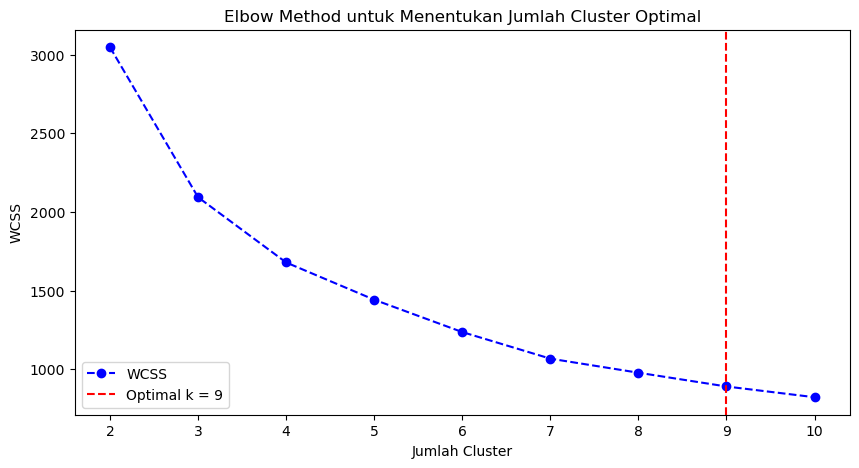

In [94]:
# Visualisasi hasil Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(list(K_range), wcss, marker='o', linestyle='--', color='b', label='WCSS')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.axvline(x=optimal_k_elbow, linestyle='--', color='r', label=f'Optimal k = {optimal_k_elbow}')
plt.legend()
plt.show()

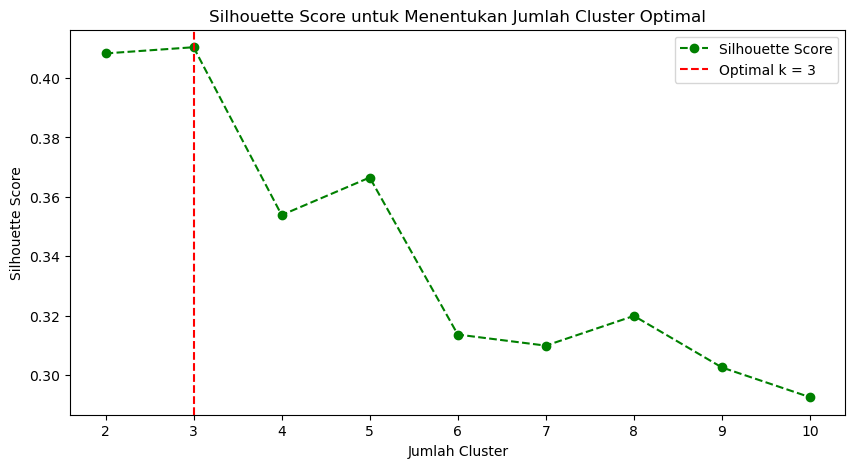

In [95]:
# Visualisasi hasil Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(list(K_range), silhouette_scores, marker='o', linestyle='--', color='g', label='Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Menentukan Jumlah Cluster Optimal')
plt.axvline(x=optimal_k_silhouette, linestyle='--', color='r', label=f'Optimal k = {optimal_k_silhouette}')
plt.legend()
plt.show()

In [96]:
# Latih model K-Means dengan jumlah cluster optimal (yaitu :  10 )
kmeans_elbow = KMeans(n_clusters= 9, random_state=42)
kmeans_elbow.fit(X_train)

KMeans(n_clusters=9, random_state=42)

In [97]:
# Latih model K-Means dengan jumlah cluster optimal (yaitu :  10 )
kmeans_silhouette = KMeans(n_clusters= 3, random_state=42)
kmeans_silhouette.fit(X_train)

KMeans(n_clusters=3, random_state=42)

In [98]:
# Prediksi cluster untuk train dan test
train_labels = kmeans_elbow.predict(X_train)
test_labels = kmeans_elbow.predict(X_test)

In [99]:
# Prediksi cluster untuk train dan test
train_labels = kmeans_silhouette.predict(X_train)
test_labels = kmeans_silhouette.predict(X_test)

In [100]:
# Tambahkan hasil cluster ke DataFrame asli (opsional)
df_cluster['Cluster Elbow'] = kmeans_elbow.predict(X_scaled)
df_cluster['Cluster Silhouette'] = kmeans_silhouette.predict(X_scaled)

In [101]:
df_cluster

,title,steps,loves,ingredients_list,total_calories_estimated,num_ingredients,Cluster Elbow,Cluster Silhouette
0,Ayam Woku Manado,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,"[1 Ekor Ayam Kampung (potong 12), 2 Buah Jeruk...",1218.0,14,0,0
1,Ayam goreng tulang lunak,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,[1 kg ayam (dipotong sesuai selera jangan keci...,1802.0,11,1,1
2,Ayam cabai kawin,Panaskan minyak di dalam wajan. Setelah minyak...,2,"[1/4 kg ayam, 3 buah cabai hijau besar, 7 buah...",436.0,10,7,0
3,Ayam Geprek,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,"[250 gr daging ayam (saya pakai fillet), Secuk...",652.0,7,7,0
4,Minyak Ayam,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,"[400 gr kulit ayam & lemaknya, 8 siung bawang ...",852.0,5,7,0
...,...,...,...,...,...,...,...,...
1911,Nugget ayam simpel,"Haluskan bawang putih, merica, dan garam--Camp...",0,"[400 gram ayam giling, 1 lembar roti tawar kup...",756.0,9,7,0
1912,Ukepan Ayam,"Haluskan semua bumbu kecuali lengkuas, serai, ...",7,"[1/2 kg ayam, 6 siung bawang merah, 6 siung ba...",1476.0,12,8,0
1913,Chicken Stroganoff with Mushroom,"Panaskan butter dan minyak goreng, masak ayam ...",3,"[Fillet ayam, cuci bersih & lumuri sedikit tep...",1555.0,11,8,0
1914,Sop Pangsit Ayam,Cuci ayam dengan menggunakan jeruk nipis dan g...,3,"[1/4 kg dada ayam, 1 buah jeruk nipis, 2 cm Ja...",1282.0,16,1,1


In [102]:
# Konversi kembali X_train ke DataFrame
X_train_df = pd.DataFrame(X_train, columns=['total_calories_estimated', 'loves', 'num_ingredients'])

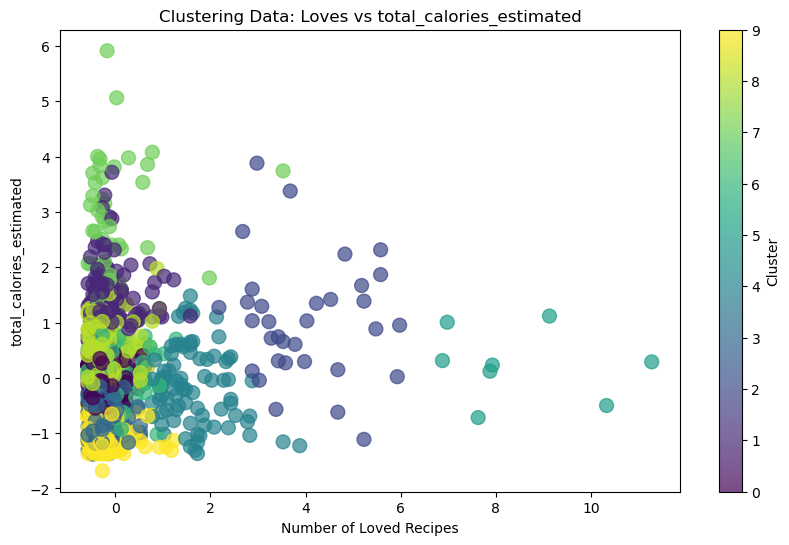

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_df['loves'], X_train_df['total_calories_estimated'], c=cluster_labels, cmap='viridis', marker='o', s=100, alpha=0.7)
plt.title("Clustering Data: Loves vs total_calories_estimated")
plt.xlabel("Number of Loved Recipes")
plt.ylabel("total_calories_estimated")
plt.colorbar(label='Cluster')
plt.show()

In [104]:
# Konversi data menjadi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

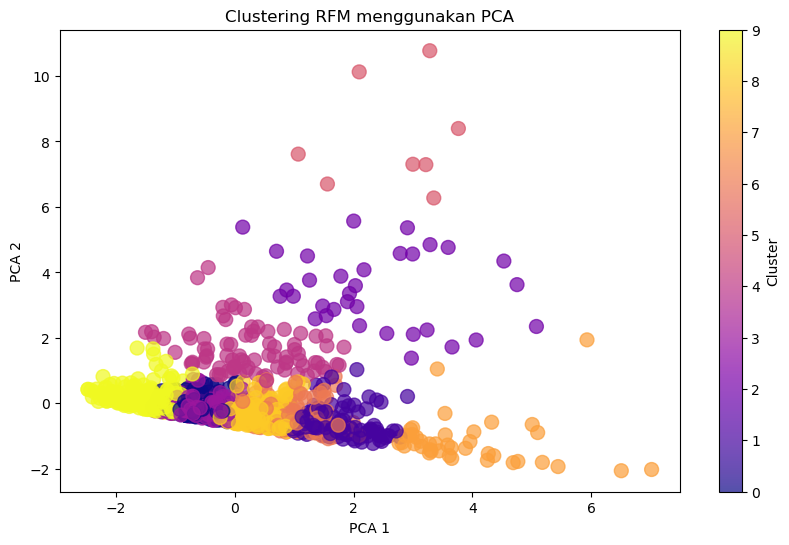

In [105]:
# Scatter plot hasil PCA
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='plasma', marker='o', s=100, alpha=0.7)
plt.title("Clustering RFM menggunakan PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.show()

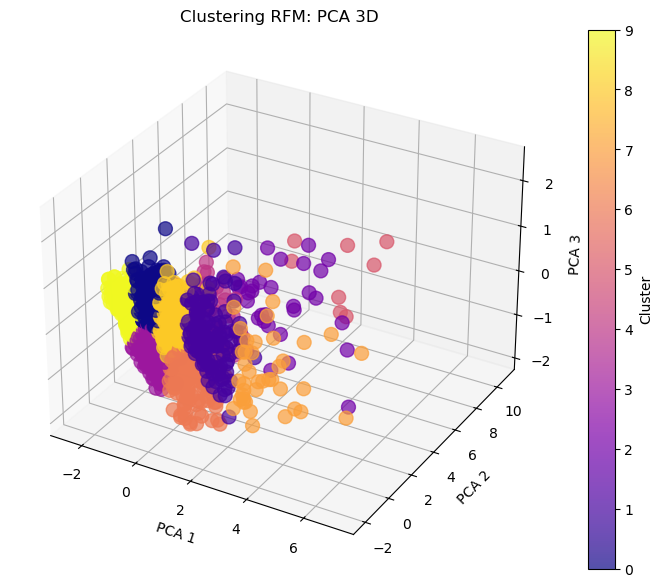

In [106]:
from mpl_toolkits.mplot3d import Axes3D

# Reduksi data ke 3D menggunakan PCA
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_train)

# Visualisasi 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=cluster_labels, cmap='plasma', s=100, alpha=0.7)

# Tambahkan label dan legenda
ax.set_title("Clustering RFM: PCA 3D")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.colorbar(scatter, label='Cluster')
plt.show()

In [107]:
# Menggunakan hasil clustering 
kmeans = KMeans(n_clusters=9, random_state=42)
cluster_labels_elbow = kmeans_elbow.fit_predict(X_train_df)

kmeans = KMeans(n_clusters=9, random_state=42)
cluster_labels_silhouette = kmeans_silhouette.fit_predict(X_train_df)

# Hitung silhouette score
silhouette_avg = silhouette_score(X_train_df, cluster_labels_silhouette)
print(f"Silhouette Score: {silhouette_avg:.3f}")


Silhouette Score: 0.410


In [108]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index
dbi_score_elbow = davies_bouldin_score(X_train_df, cluster_labels_elbow)
dbi_score_silhoutte = davies_bouldin_score(X_train_df, cluster_labels_silhouette)
#X_train_df merupakan dataframe hasil standardisasi, sebelum dilakukan analisis model unsupervised
#cluster_label merupakan hasil model unsupervised
print(f"Davies-Bouldin Index: {dbi_score_elbow:.3f}")
print(f"Davies-Bouldin Index: {dbi_score_silhoutte:.3f}")

Davies-Bouldin Index: 1.019
Davies-Bouldin Index: 0.898


In [109]:
from sklearn.metrics import calinski_harabasz_score

# Menghitung Calinski-Harabasz Index
ch_score_elbow = calinski_harabasz_score(X_train_df, cluster_labels_elbow)
ch_score_silhoutte = calinski_harabasz_score(X_train_df, cluster_labels_silhouette)
print(f"Calinski-Harabasz Index: {ch_score_elbow:.3f}")
print(f"Calinski-Harabasz Index: {ch_score_silhoutte:.3f}")

Calinski-Harabasz Index: 765.472
Calinski-Harabasz Index: 915.211


Silhouette-based clustering adalah pilihan terbaik dari:

Davies-Bouldin Index (lebih rendah lebih baik)

Calinski-Harabasz Index (lebih tinggi lebih baik)

In [110]:
df_cluster['Cluster Silhouette'].value_counts()

Cluster Silhouette
0    1183
1     657
2      76
Name: count, dtype: int64

In [111]:
# Misal pakai cluster_labels_silhouette
resep_clustered = df_cluster.copy()

In [112]:
cluster_summary = resep_clustered.groupby('Cluster Silhouette').agg({
    'loves': 'mean',
    'total_calories_estimated': 'mean',
    'num_ingredients': 'mean'
}).round(1)
print(cluster_summary)

                    loves total_calories_estimated  num_ingredients
Cluster Silhouette                                                 
0                     7.5               856.375317             10.5
1                     9.2              1820.630594             18.3
2                    91.7              1556.447368             15.6


In [113]:
cluster_labels = {
    0: 'Klaster Sehat',
    1: 'Klaster Favorit',
    2: 'Simpel & Menengah'
}

resep_clustered['cluster_label'] = resep_clustered['Cluster Silhouette'].map(cluster_labels)


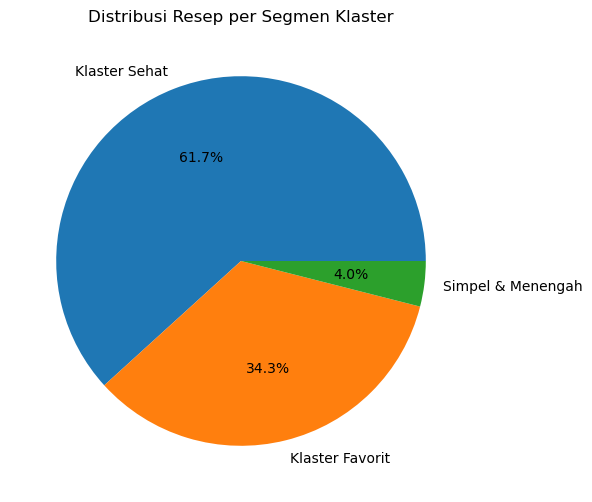

In [114]:
resep_clustered['cluster_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Distribusi Resep per Segmen Klaster")
plt.ylabel('')
plt.show()


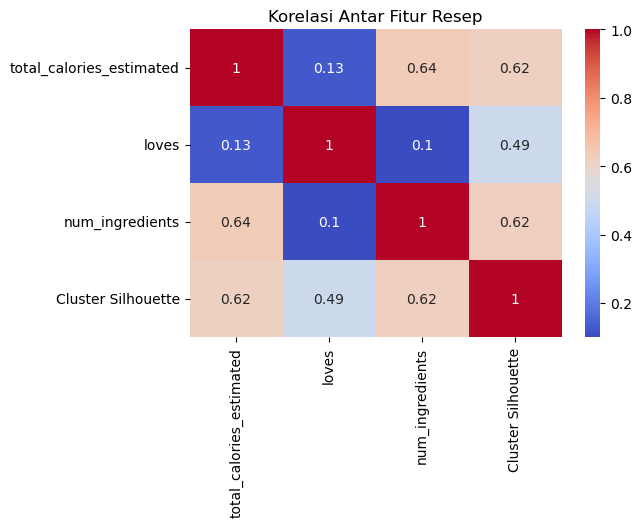

In [115]:
# 6. Heatmap korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(df_cluster[['total_calories_estimated', 'loves', 'num_ingredients', 'Cluster Silhouette']].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Resep")
plt.show()

In [116]:
df_cluster.to_csv('cluster final.csv')

In [117]:
df_cluster

,title,steps,loves,ingredients_list,total_calories_estimated,num_ingredients,Cluster Elbow,Cluster Silhouette
0,Ayam Woku Manado,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,"[1 Ekor Ayam Kampung (potong 12), 2 Buah Jeruk...",1218.0,14,0,0
1,Ayam goreng tulang lunak,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,[1 kg ayam (dipotong sesuai selera jangan keci...,1802.0,11,1,1
2,Ayam cabai kawin,Panaskan minyak di dalam wajan. Setelah minyak...,2,"[1/4 kg ayam, 3 buah cabai hijau besar, 7 buah...",436.0,10,7,0
3,Ayam Geprek,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,"[250 gr daging ayam (saya pakai fillet), Secuk...",652.0,7,7,0
4,Minyak Ayam,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,"[400 gr kulit ayam & lemaknya, 8 siung bawang ...",852.0,5,7,0
...,...,...,...,...,...,...,...,...
1911,Nugget ayam simpel,"Haluskan bawang putih, merica, dan garam--Camp...",0,"[400 gram ayam giling, 1 lembar roti tawar kup...",756.0,9,7,0
1912,Ukepan Ayam,"Haluskan semua bumbu kecuali lengkuas, serai, ...",7,"[1/2 kg ayam, 6 siung bawang merah, 6 siung ba...",1476.0,12,8,0
1913,Chicken Stroganoff with Mushroom,"Panaskan butter dan minyak goreng, masak ayam ...",3,"[Fillet ayam, cuci bersih & lumuri sedikit tep...",1555.0,11,8,0
1914,Sop Pangsit Ayam,Cuci ayam dengan menggunakan jeruk nipis dan g...,3,"[1/4 kg dada ayam, 1 buah jeruk nipis, 2 cm Ja...",1282.0,16,1,1
